In [1]:
import pandas as pd
import numpy as np
import os
import json
import pprint
from collections import Counter
import statsmodels.formula.api as smf
import os
import json
from pprint import pprint
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm

In [45]:
table_for_model = pd.read_excel('final_data_clean.xlsx')
table_for_model.index=range(len(table_for_model))
table_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 7 columns):
title                3233 non-null object
domestic_gross       3233 non-null int64
director             3233 non-null object
genre                3233 non-null object
year                 3233 non-null int64
actors               3233 non-null object
release_date_wide    3233 non-null object
dtypes: int64(2), object(5)
memory usage: 202.1+ KB


# Actors

In [46]:
actor_df = table_for_model[["title","actors"]]
double_list = [item.split(', ') for item in actor_df.actors if type(item) is unicode]
actor_list = [item for sublist in double_list for item in sublist]
actor_count = Counter(actor_list)
top_actors_and_counts = actor_count.most_common(400)
top_actors = [item[0] for item in top_actors_and_counts if item[0] is not float]
top_actors


for i in range(len(actor_df)):
        list_of_actors = actor_df.loc[i,'actors'].split(", ")
        for actor in list_of_actors:
            if actor in top_actors:
                actor_df.loc[i,'Top Actor'] = 1
                break
            else:
                actor_df.loc[i,'Top Actor'] = 0

In [61]:
actor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 3 columns):
title        3233 non-null object
actors       3233 non-null object
Top Actor    3233 non-null float64
dtypes: float64(1), object(2)
memory usage: 101.0+ KB


# Directors

In [48]:
director_df = table_for_model[['title','director']]
director_df.info()

from collections import Counter
Counter(table_for_model.director).most_common(100)
top_directors_and_counts =  list(Counter(table_for_model.director).most_common(100))
top_directors = [item[0] for item in top_directors_and_counts if item[0] is not float]
top_directors

director_df["Top Director"] = director_df.director.isin(top_directors)
director_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 2 columns):
title       3233 non-null object
director    3233 non-null object
dtypes: object(2)
memory usage: 75.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 3 columns):
title           3233 non-null object
director        3233 non-null object
Top Director    3233 non-null bool
dtypes: bool(1), object(2)
memory usage: 78.9+ KB


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Genres

In [56]:
table_for_model['genre']

features = [feature for feature in table_for_model['genre']]
# genres = [[item for sublist in features if sublist.split() is not np.nan for item in sublist]]
genres = [item.split(', ') for item in features if type(item) is unicode]
genres = [item for sublist in genres for item in sublist]
genres = set(genres)

print len(genres)
genre_df = pd.DataFrame()
genre_df['genre'] = table_for_model.loc[:,'genre']

23


In [57]:
new_df=pd.DataFrame([1,2,3])
for i in range(len(table_for_model)):
    try:
        new_df=pd.concat([new_df,pd.DataFrame(table_for_model.genre[i].split(', '))],axis=1)
    except:
        new_df=pd.concat([new_df,pd.DataFrame([np.nan,np.nan,np.nan])],axis=1)
new_df=new_df.T

In [58]:
new_df.index=range(len(new_df))
#mojo_our=mojo_our.drop(mojo_our.index[[1432,2794,2803]])
new_df=new_df.drop(new_df.index[[0]])
new_df.columns=['G1','G2','G3']
new_df.head()

,G1,G2,G3
1,Action,Adventure,Drama
2,Adventure,Comedy,Family
3,Comedy,Drama,Romance
4,Comedy,Drama,Romance
5,Drama,NaN,NaN


In [59]:
new_df.index=range(len(new_df))
final_gener=pd.concat([genre_df,new_df],axis=1)
#final_gener.head()
for i in range(len(final_gener)):
    for gen in genres:
        if final_gener.loc[i,'G1']==gen: 
            final_gener.loc[i,str(gen)]=1
        elif final_gener.loc[i,'G2']==gen:
            final_gener.loc[i,str(gen)]=1
        elif final_gener.loc[i,'G3']==gen:
            final_gener.loc[i,str(gen)]=1
        else:
            final_gener.loc[i,str(gen)]=0
final_gener.head()

,genre,G1,G2,G3,Sci-Fi,Crime,Romance,Animation,Music,Comedy,...,Short,Drama,Action,Documentary,Musical,History,Family,Fantasy,Sport,Biography
0,"Action, Adventure, Drama",Action,Adventure,Drama,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,"Adventure, Comedy, Family",Adventure,Comedy,Family,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,"Comedy, Drama, Romance",Comedy,Drama,Romance,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,"Comedy, Drama, Romance",Comedy,Drama,Romance,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,Drama,Drama,NaN,NaN,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
final_gener.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 27 columns):
genre          3233 non-null object
G1             3233 non-null object
G2             2747 non-null object
G3             1790 non-null object
Sci-Fi         3233 non-null float64
Crime          3233 non-null float64
Romance        3233 non-null float64
Animation      3233 non-null float64
Music          3233 non-null float64
Comedy         3233 non-null float64
War            3233 non-null float64
Horror         3233 non-null float64
Adventure      3233 non-null float64
News           3233 non-null float64
Thriller       3233 non-null float64
Western        3233 non-null float64
Mystery        3233 non-null float64
Short          3233 non-null float64
Drama          3233 non-null float64
Action         3233 non-null float64
Documentary    3233 non-null float64
Musical        3233 non-null float64
History        3233 non-null float64
Family         3233 non-null float64
Fantasy  

# Merging

In [63]:
remaning_feature=table_for_model[['year','domestic_gross']]
remaning_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 2 columns):
year              3233 non-null int64
domestic_gross    3233 non-null int64
dtypes: int64(2)
memory usage: 75.8 KB


In [68]:
table1 = pd.concat([actor_df,director_df],axis=1)
table2=pd.concat([table1,final_gener],axis=1)
final_table=pd.concat([table2,remaning_feature],axis=1)
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 35 columns):
title             3233 non-null title    object
title    object
dtype: object
actors            3233 non-null object
Top Actor         3233 non-null float64
title             3233 non-null title    object
title    object
dtype: object
director          3233 non-null object
Top Director      3233 non-null bool
genre             3233 non-null object
G1                3233 non-null object
G2                2747 non-null object
G3                1790 non-null object
Sci-Fi            3233 non-null float64
Crime             3233 non-null float64
Romance           3233 non-null float64
Animation         3233 non-null float64
Music             3233 non-null float64
Comedy            3233 non-null float64
War               3233 non-null float64
Horror            3233 non-null float64
Adventure         3233 non-null float64
News              3233 non-null float64
Thriller          3233 non

In [71]:
l1=final_table.columns
l1=set(l1)

In [79]:
l2=set(['G1','G2','G3','genre','director','actors'])
l3=list(l1-l2)

In [81]:
model_table=final_table[l3]
model_table.to_excel('model_table.xlsx')

In [82]:
pwd

u'/Users/rdc046/Desktop/team4_project1/team4_project1/raw_data'

In [83]:
#split the data into train(0.75) and test(0.25)
from sklearn.cross_validation import train_test_split
train, test = train_test_split(model_table, test_size = 0.25)

In [88]:
#fit lasso CV model
#predictor_list is the list of variables that we want to use for modelling
#here I get it from the column names -predictors and movie title. you
#can create your own directly from the name list
predictor_list = list(train.columns.values)
predictor_list.remove('domestic_gross')
predictor_list.remove('title')
predictor_list.remove('title')

In [91]:
#fit the lasso model, which get selection and estimation at one step.
#if you want to see which variable is significant, there is an easy way:
#just look at the coefficients, greater than 0 means that it is used for prediction

from sklearn.linear_model import LassoCV
clf = LassoCV(cv=20).fit(train[predictor_list],train.domestic_gross)
Y_pred = clf.predict(test[predictor_list])




In [94]:
print(clf.coef_)

#calculate the mean_squared_error
from sklearn.metrics import mean_squared_error
print mean_squared_error(Y_pred, test.domestic_gross)

[ 24948879.28883447  14743721.37371736  -6442580.48915141
   1266242.81140408  27882393.29100273        -0.           -974183.98583626
        -0.                -0.          -6503504.27564067
  26178465.61410237         0.            427041.58008877
  -2752435.99988513        -0.                -0.                 0.
 -13517821.94222899  20843906.30519133  14101080.43734857
  -9749380.63567394  19879182.78291661   7307000.67157429
   4586394.70214889        -0.                 0.        ]
2.68276296046e+15


In [102]:
pd.DataFrame([clf.coef_,predictor_list]).T.sort()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,1
17,-1.35178e+07,Drama
20,-9.74938e+06,Documentary
9,-6.5035e+06,Horror
2,-6.44258e+06,Crime
13,-2.75244e+06,Thriller
6,-974184,year
25,0,Biography
16,0,Short
5,-0,Music
7,-0,Comedy


(-25000000.0, 200000000.0)

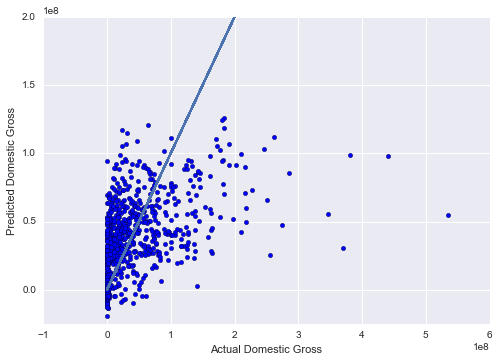

In [125]:
plt.scatter(test.domestic_gross,Y_pred)
plt.xlabel("Actual Domestic Gross")
plt.ylabel("Predicted Domestic Gross")
plt.plot(test.domestic_gross,test.domestic_gross)
plt.ylim([-.25e8,2e8])
plt.title()


In [103]:
model_table.plt(time,domestic_growth)

AttributeError: 'DataFrame' object has no attribute 'plt'

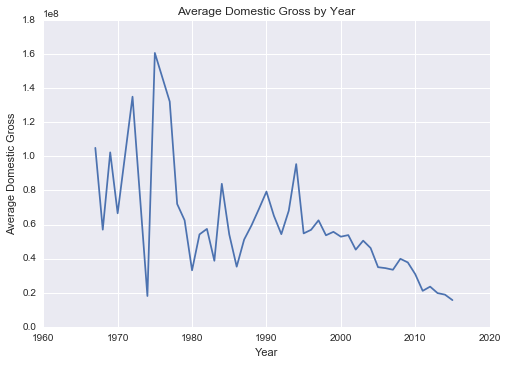

In [114]:
import matplotlib.pyplot as plt
plt.plot(model_table[['year','domestic_gross']].groupby('year').mean())
plt.ylabel("Average Domestic Gross")
plt.xlabel("Year")
plt.title("Average Domestic Gross by Year")

In [109]:
plt.scatter(model_table[['year','domestic_gross']].groupby('year').mean())
plt.ylabel("Average Domestic Gross")
plt.xlabel("Year")

TypeError: scatter() takes at least 2 arguments (1 given)

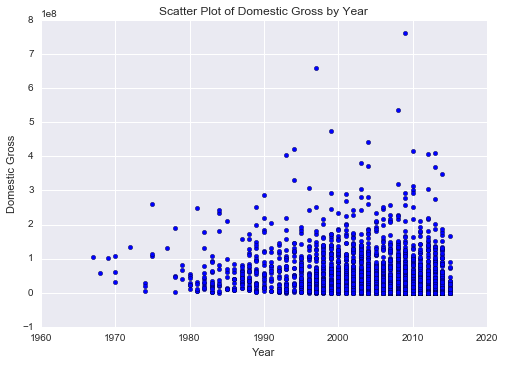

In [115]:
plt.scatter(model_table.year,model_table.domestic_gross)
plt.ylabel("Domestic Gross")
plt.xlabel("Year")
plt.title("Scatter Plot of Domestic Gross by Year")